### Practical Week 8: Working with Tweets of Joe Biden (Solutions)

In [16]:
import tweepy

**Task 1**: Read the file 'biden-150-tweets.txt' that consists of a list of tweets in the form of JSON objects (dictionaries) 
    into a new list of simpler dictionaries. Each of these simpler dictionaries should contain only the following keys:  'text', 'favorite_count', 'retweet_count' and 'created_at' as shown below.

In [20]:
import json

list = []
with open('biden-150-tweets.txt', encoding='utf-8', mode = 'r') as file:  
    list_of_dicts = json.load(file)
    for dict in list_of_dicts:
        list.append({'text': str(dict['text']),
                     'favorite_count': int(dict['favorite_count']),
                     'retweet_count': int(dict['retweet_count']),
                     'created_at': dict['created_at'],
                     })


In [21]:
print(list[0])

{'text': "Dark money erodes public trust. We need to protect public trust—and I'm determined to do that.\n\nRepublicans should… https://t.co/1kT6cgVvBX", 'favorite_count': 13439, 'retweet_count': 2674, 'created_at': 'Tue Sep 20 22:55:01 +0000 2022'}


**Task 2**: Read the list with the simplified tweets into a pandas DataFrame and display the DataFrame.

In [22]:
import pandas as pd

df = pd.DataFrame(list, columns = ['text', 'favorite_count', 'retweet_count', 'created_at'])
df

,text,favorite_count,retweet_count,created_at
0,Dark money erodes public trust. We need to pro...,13439,2674,Tue Sep 20 22:55:01 +0000 2022
1,"For our democracy to work, it is up to all of ...",5231,1401,Tue Sep 20 14:10:01 +0000 2022
2,"On National Voter Registration Day, @TheDemocr...",3507,1003,Mon Sep 19 22:55:03 +0000 2022
3,Social Security and Medicare.\nA woman's right...,36444,8022,Mon Sep 19 20:00:13 +0000 2022
4,There are only 50 days until the midterms. \n\...,15033,2587,Mon Sep 19 14:18:00 +0000 2022
...,...,...,...,...
145,RT @POTUS: I’m addressing the nation on a succ...,0,2661,Mon Aug 01 23:39:14 +0000 2022
146,"RT @POTUS: Folks, today I tested positive for ...",0,11852,Sat Jul 30 22:38:42 +0000 2022
147,"RT @POTUS: Fifty-seven years ago, Medicare bec...",0,4530,Sat Jul 30 17:34:13 +0000 2022
148,"While COVID is still with us, our fight agains...",15991,2068,Sat Jul 30 17:04:00 +0000 2022


**Task 3**: Generate a list 'text_list' that contains the texts of each tweet and print this list as shown below.

In [23]:
text_list = [m for m in df['text']]
text_list

["Dark money erodes public trust. We need to protect public trust—and I'm determined to do that.\n\nRepublicans should… https://t.co/1kT6cgVvBX",
 'For our democracy to work, it is up to all of us to protect the right to vote—and exercise it. The first step that… https://t.co/O68UuM6fx6',
 'On National Voter Registration Day, @TheDemocrats are making sure everyone has the tools to talk to their community… https://t.co/sVFfHMZVqK',
 "Social Security and Medicare.\nA woman's right to choose.\nAn assault weapons ban.\nVoting rights.\n\nIt’s all on the line in November.",
 'There are only 50 days until the midterms. \n\nImagine the possibilities if we elect more Democrats to the Senate and… https://t.co/zOboc6pkJO',
 'The single best-trained workers and trades in the world are American union workers.',
 'The Inflation Reduction Act will lower prescription drug costs, health care costs, and energy costs for millions of… https://t.co/iu5cSTv76R',
 'The Bipartisan Infrastructure Law will inve

**Task 4**: Calculate the length of the text of each tweet and add a new column 'length' to the DataFrame.

In [24]:
text_list_length = [len(m.split()) for m in text_list]     
df['length'] = text_list_length
df

,text,favorite_count,retweet_count,created_at,length
0,Dark money erodes public trust. We need to pro...,13439,2674,Tue Sep 20 22:55:01 +0000 2022,19
1,"For our democracy to work, it is up to all of ...",5231,1401,Tue Sep 20 14:10:01 +0000 2022,25
2,"On National Voter Registration Day, @TheDemocr...",3507,1003,Mon Sep 19 22:55:03 +0000 2022,19
3,Social Security and Medicare.\nA woman's right...,36444,8022,Mon Sep 19 20:00:13 +0000 2022,22
4,There are only 50 days until the midterms. \n\...,15033,2587,Mon Sep 19 14:18:00 +0000 2022,21
...,...,...,...,...,...
145,RT @POTUS: I’m addressing the nation on a succ...,0,2661,Mon Aug 01 23:39:14 +0000 2022,12
146,"RT @POTUS: Folks, today I tested positive for ...",0,11852,Sat Jul 30 22:38:42 +0000 2022,25
147,"RT @POTUS: Fifty-seven years ago, Medicare bec...",0,4530,Sat Jul 30 17:34:13 +0000 2022,23
148,"While COVID is still with us, our fight agains...",15991,2068,Sat Jul 30 17:04:00 +0000 2022,22


**Task 5**: Plot the frequencies of the tweet lengths using a bar plot as illustrated below.

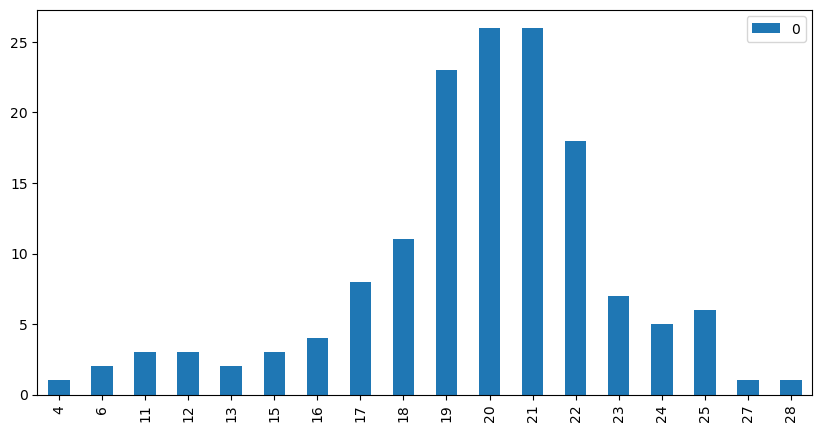

In [25]:
import matplotlib.pyplot as plt
from collections import Counter

text_list_length.sort()
freq_counts = Counter(text_list_length)
df2 = pd.DataFrame.from_dict(freq_counts, orient = 'index')

df2.plot(kind = 'bar', figsize = (10, 5));

**Task 6**: Use the information in the column 'created_at' and add a column 'hour' to the DataFrame as illustrated below.

In [26]:
df['created_at'] = pd.to_datetime(df['created_at'], format='mixed')
df['hour'] = df['created_at'].dt.hour
df

,text,favorite_count,retweet_count,created_at,length,hour
0,Dark money erodes public trust. We need to pro...,13439,2674,2022-09-20 22:55:01+00:00,19,22
1,"For our democracy to work, it is up to all of ...",5231,1401,2022-09-20 14:10:01+00:00,25,14
2,"On National Voter Registration Day, @TheDemocr...",3507,1003,2022-09-19 22:55:03+00:00,19,22
3,Social Security and Medicare.\nA woman's right...,36444,8022,2022-09-19 20:00:13+00:00,22,20
4,There are only 50 days until the midterms. \n\...,15033,2587,2022-09-19 14:18:00+00:00,21,14
...,...,...,...,...,...,...
145,RT @POTUS: I’m addressing the nation on a succ...,0,2661,2022-08-01 23:39:14+00:00,12,23
146,"RT @POTUS: Folks, today I tested positive for ...",0,11852,2022-07-30 22:38:42+00:00,25,22
147,"RT @POTUS: Fifty-seven years ago, Medicare bec...",0,4530,2022-07-30 17:34:13+00:00,23,17
148,"While COVID is still with us, our fight agains...",15991,2068,2022-07-30 17:04:00+00:00,22,17


**Task 7**: Use a bar plot and plot the frequencies of the times at which tweets were sent (at hourly intervals).

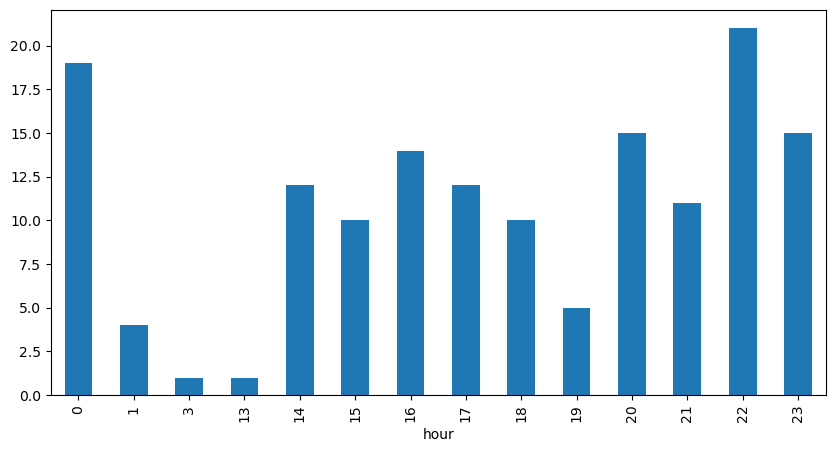

In [27]:
df['hour'].value_counts().sort_index().plot(kind = 'bar', figsize = (10, 5));

**Task 8**: Use a regular expression that finds the hashtags in the tweets ('text'), add them to a new column 'hashtag' and display the resulting DataFrame. 

In [28]:
import re
df['hashtag'] = df['text'].apply(lambda x: re.findall(r'#(\w+)', x))
df

,text,favorite_count,retweet_count,created_at,length,hour,hashtag
0,Dark money erodes public trust. We need to pro...,13439,2674,2022-09-20 22:55:01+00:00,19,22,[]
1,"For our democracy to work, it is up to all of ...",5231,1401,2022-09-20 14:10:01+00:00,25,14,[]
2,"On National Voter Registration Day, @TheDemocr...",3507,1003,2022-09-19 22:55:03+00:00,19,22,[]
3,Social Security and Medicare.\nA woman's right...,36444,8022,2022-09-19 20:00:13+00:00,22,20,[]
4,There are only 50 days until the midterms. \n\...,15033,2587,2022-09-19 14:18:00+00:00,21,14,[]
...,...,...,...,...,...,...,...
145,RT @POTUS: I’m addressing the nation on a succ...,0,2661,2022-08-01 23:39:14+00:00,12,23,[]
146,"RT @POTUS: Folks, today I tested positive for ...",0,11852,2022-07-30 22:38:42+00:00,25,22,[]
147,"RT @POTUS: Fifty-seven years ago, Medicare bec...",0,4530,2022-07-30 17:34:13+00:00,23,17,[]
148,"While COVID is still with us, our fight agains...",15991,2068,2022-07-30 17:04:00+00:00,22,17,[]


**Task 9**: Use a regular expression that removes all links from the tweets ('text'), add a column 'text_without_links' and display the resulting DataFrame.

In [29]:
import warnings
warnings.filterwarnings('ignore')

df['text_without_links'] = df['text'].str.replace(r'http\S+|www.\S+', '', case = False)
df

,text,favorite_count,retweet_count,created_at,length,hour,hashtag,text_without_links
0,Dark money erodes public trust. We need to pro...,13439,2674,2022-09-20 22:55:01+00:00,19,22,[],Dark money erodes public trust. We need to pro...
1,"For our democracy to work, it is up to all of ...",5231,1401,2022-09-20 14:10:01+00:00,25,14,[],"For our democracy to work, it is up to all of ..."
2,"On National Voter Registration Day, @TheDemocr...",3507,1003,2022-09-19 22:55:03+00:00,19,22,[],"On National Voter Registration Day, @TheDemocr..."
3,Social Security and Medicare.\nA woman's right...,36444,8022,2022-09-19 20:00:13+00:00,22,20,[],Social Security and Medicare.\nA woman's right...
4,There are only 50 days until the midterms. \n\...,15033,2587,2022-09-19 14:18:00+00:00,21,14,[],There are only 50 days until the midterms. \n\...
...,...,...,...,...,...,...,...,...
145,RT @POTUS: I’m addressing the nation on a succ...,0,2661,2022-08-01 23:39:14+00:00,12,23,[],RT @POTUS: I’m addressing the nation on a succ...
146,"RT @POTUS: Folks, today I tested positive for ...",0,11852,2022-07-30 22:38:42+00:00,25,22,[],"RT @POTUS: Folks, today I tested positive for ..."
147,"RT @POTUS: Fifty-seven years ago, Medicare bec...",0,4530,2022-07-30 17:34:13+00:00,23,17,[],"RT @POTUS: Fifty-seven years ago, Medicare bec..."
148,"While COVID is still with us, our fight agains...",15991,2068,2022-07-30 17:04:00+00:00,22,17,[],"While COVID is still with us, our fight agains..."


**Task 10**: Remove all retweets ('RT') from the DataFrame and display the resulting DataFrame.

In [30]:
df = df[~df['text'].str.startswith('RT')]
df

,text,favorite_count,retweet_count,created_at,length,hour,hashtag,text_without_links
0,Dark money erodes public trust. We need to pro...,13439,2674,2022-09-20 22:55:01+00:00,19,22,[],Dark money erodes public trust. We need to pro...
1,"For our democracy to work, it is up to all of ...",5231,1401,2022-09-20 14:10:01+00:00,25,14,[],"For our democracy to work, it is up to all of ..."
2,"On National Voter Registration Day, @TheDemocr...",3507,1003,2022-09-19 22:55:03+00:00,19,22,[],"On National Voter Registration Day, @TheDemocr..."
3,Social Security and Medicare.\nA woman's right...,36444,8022,2022-09-19 20:00:13+00:00,22,20,[],Social Security and Medicare.\nA woman's right...
4,There are only 50 days until the midterms. \n\...,15033,2587,2022-09-19 14:18:00+00:00,21,14,[],There are only 50 days until the midterms. \n\...
...,...,...,...,...,...,...,...,...
141,Voters in Kansas rejected extreme efforts to a...,12752,1611,2022-08-04 21:22:00+00:00,20,21,[],Voters in Kansas rejected extreme efforts to a...
142,The bipartisan PACT Act is the biggest expansi...,21135,3247,2022-08-03 01:36:18+00:00,19,1,[],The bipartisan PACT Act is the biggest expansi...
144,126 economists wrote that the Inflation Reduct...,11616,2584,2022-08-02 20:42:02+00:00,20,20,[],126 economists wrote that the Inflation Reduct...
148,"While COVID is still with us, our fight agains...",15991,2068,2022-07-30 17:04:00+00:00,22,17,[],"While COVID is still with us, our fight agains..."
